<a href="https://colab.research.google.com/github/Omega-84/code_practice/blob/main/Copy_of_Self_Project_Linear_Regression_(Car_Dekho).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## <b> CarDekho.com is India's leading car search venture that helps users buy cars that are right for them. Its website and app carry rich automotive content such as expert reviews, detailed specs and prices, comparisons as well as videos and pictures of all car brands and models available in India. The company has tie-ups with many auto manufacturers, more than 4000 car dealers and numerous financial institutions to facilitate the purchase of vehicles.

## <b> CarDekho.com has launched many innovative features to ensure that users get an immersive experience of the car model before visiting a dealer showroom. These include a Feel The Car tool that gives 360-degree interior/exterior views with sounds of the car and explanations of features with videos; search and comparison by make, model, price, features; and live offers and promotions in all cities. The platform also has used car classifieds wherein users can upload their cars for sale, and find used cars for buying from individuals and used car dealers.

## <b> Besides the above consumer product features, CarDekho.com provides a rich array of tech-enabled tools to OE manufacturers and car dealers. These include apps for dealer sales executives to manage leads, cloud services for tracking sales performance, call tracker solution, digital marketing support, virtual online showroom and outsourced lead management operational process for taking consumers from enquiry to sale.

## <b> Our vision is to construct a complete ecosystem for consumers and car manufacturers, dealers and related businesses such that consumers have easy and complete access to not only buying and selling cars, but also manage their entire ownership experience, be it accessories, tyres, batteries, insurance or roadside assistance. </b>

## <b>In this project, the dataset contains information about used cars listed on www.cardekho.com. This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.</b>

## <b>The columns in the given dataset are as follows:</b>

- ### name
- ### year
- ### selling_price
- ### km_driven
- ### fuel
- ### seller_type
- ### transmission
- ### Owner

## <b>Load up this dataset in the kernel and perform initial exploratory data analysis (EDA). You should also try creating new features based on the existing ones. The dependent variable is the <code>selling_price</code>. 

## <b> Your task is to build a linear regression model on this dataset (always split into train and test). Evaluate the fitted model on test data using different regression metrics. Also use your linear regression model from <code>statsmodels.api</code> to run a similar regression and obtain parameter inferences for each of the model variables. Next, you need to try if regularizing your model helps you perform well on the test dataset. For this, use <code> Ridge</code> and <code>Lasso</code> regressions on the dataset and check for different values of the tuning parameter ($\lambda$ or $\alpha$ , do not confuse this $\alpha$ with the learning rate.) For each of the above regressions, get the feature importances using the regression coefficients.

## <b><u> Few things to keep in mind :</u>
* ### You should take care of categorical variables (variables which take discrete categories or classes) and do one-hot encoding to be able to pass them into the model.
* ### Try to include as many plots and charts you can. This adds for a great visual interpretation of your tasks/activities.
* ### Write detailed explanation of your approaches in the notebook and once you have some results, try to provide explanations for these observed results. Remember our objective is not only to build a machine learning model but to be able to explain why, what and how of the entire modeling process.

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import statsmodels.api as sm

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
cd_df = pd.read_csv('/content/drive/MyDrive/Copy of CAR DETAILS FROM CAR DEKHO.csv')

In [ ]:
cd_df.shape

(4340, 8)

In [ ]:
cd_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
cd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [ ]:
#Checking nulls
cd_df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [ ]:
#Checking duplicates
cd_df.duplicated().value_counts()
#True counts gives numbers of duplicates rows

False    3577
True      763
dtype: int64

In [ ]:
#Filtering out duplicates
cd_df = cd_df[cd_df.duplicated()==False]

In [ ]:
cd_df.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
count,3577,3577.000000,3.577000e+03,3577.000000,3577,3577,3577,3577
unique,1491,NaN,NaN,NaN,5,3,2,5
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner
freq,54,NaN,NaN,NaN,1800,2832,3265,2218
mean,NaN,2012.962538,4.739125e+05,69250.545709,NaN,NaN,NaN,NaN
std,NaN,4.251759,5.093018e+05,47579.940016,NaN,NaN,NaN,NaN
min,NaN,1992.000000,2.000000e+04,1.000000,NaN,NaN,NaN,NaN
25%,NaN,2010.000000,2.000000e+05,36000.000000,NaN,NaN,NaN,NaN
50%,NaN,2013.000000,3.500000e+05,60000.000000,NaN,NaN,NaN,NaN
75%,NaN,2016.000000,6.000000e+05,90000.000000,NaN,NaN,NaN,NaN


In [ ]:
cd_df.columns.to_list()

['name',
 'year',
 'selling_price',
 'km_driven',
 'fuel',
 'seller_type',
 'transmission',
 'owner']

In [ ]:
#@title Creating a copy of original dataframe
tmp_df = cd_df.copy()

In [ ]:
tmp_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
tmp_df.rename(columns={'name':'Name','year':'Year','owner':'Ownership type','km_driven':'Kms driven','fuel':'Fuel type','transmission':'Transmission','seller_type':'Seller type','selling_price':'Selling price'},inplace=True)

In [ ]:
tmp_df

,Name,Year,Selling price,Kms driven,Fuel type,Seller type,Transmission,Ownership type
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [ ]:
tmp_df.reset_index(inplace=True)

In [ ]:
tmp_df.drop('index',axis=1,inplace=True)

In [ ]:
tmp_df

,Name,Year,Selling price,Kms driven,Fuel type,Seller type,Transmission,Ownership type
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
3572,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
3573,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
3574,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
3575,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


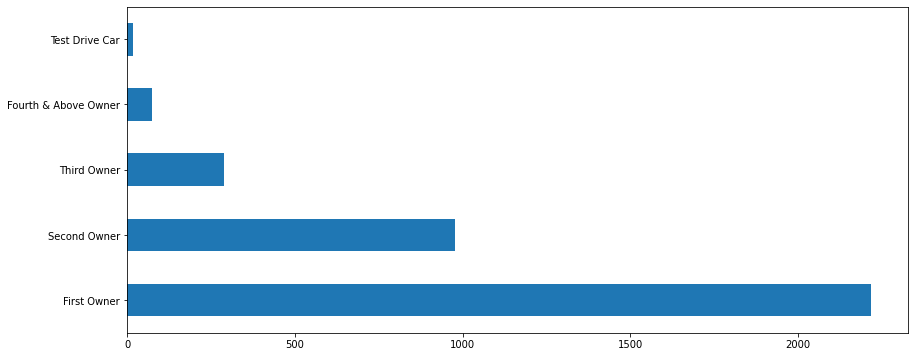

In [ ]:
#Distribution of ownership types
tmp_df['Ownership type'].value_counts().plot(kind='barh',figsize=(14,6));

### **Majority is first owners which is true as people look for new cars**

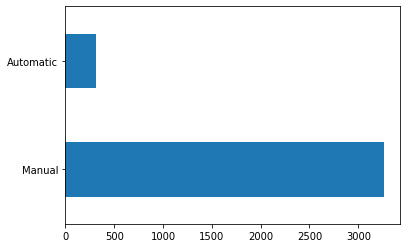

In [ ]:
#Transmission types
tmp_df['Transmission'].value_counts().plot(kind='barh');

### **Most cars use manual transmission and gear control instead of automatics**

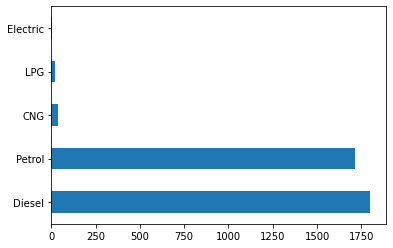

In [ ]:
#Fuel types distribution
tmp_df['Fuel type'].value_counts().plot(kind='barh');

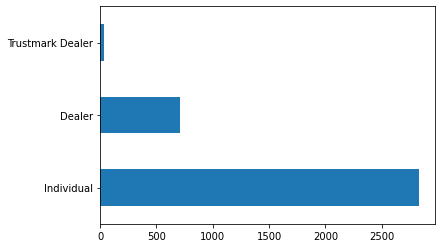

In [ ]:
#Seller type
tmp_df['Seller type'].value_counts().plot(kind='barh');

In [ ]:
#Age of vehicle is current year - year of manufacturer
tmp_df['Age'] = pd.datetime.now().year - tmp_df['Year']

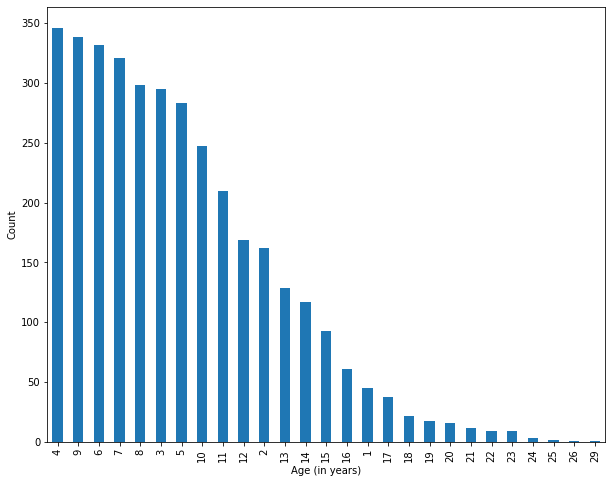

In [ ]:
tmp_df['Age'].value_counts().plot(kind='bar',figsize=(10,8))
plt.xlabel("Age (in years)")
plt.ylabel("Count");

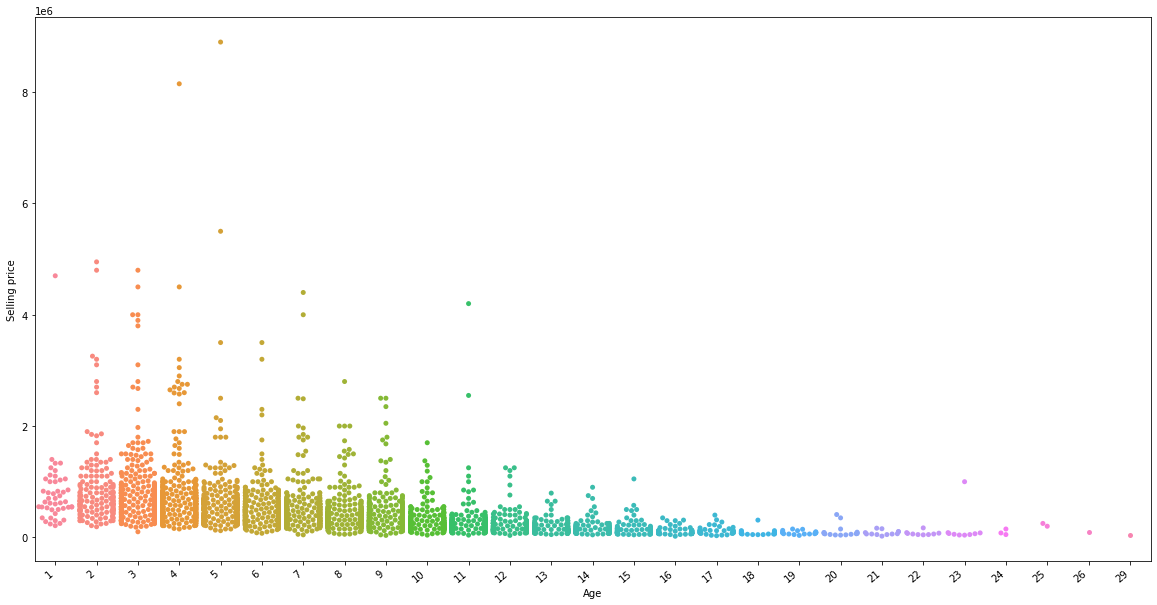

In [ ]:
#@title Swarmplot of various manufacturers vs their price
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='Age',y='Selling price',data=tmp_df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right');

### **Rightly skewed distribution for age as newer cars tend to have more value than older cars**

In [ ]:
tmp_df.drop('Year',axis=1,inplace=True)

In [ ]:
#Manufacturer/ company of car is first word in the name
tmp_df['Manufacturer'] = tmp_df['Name'].str.split(' ').str[0]

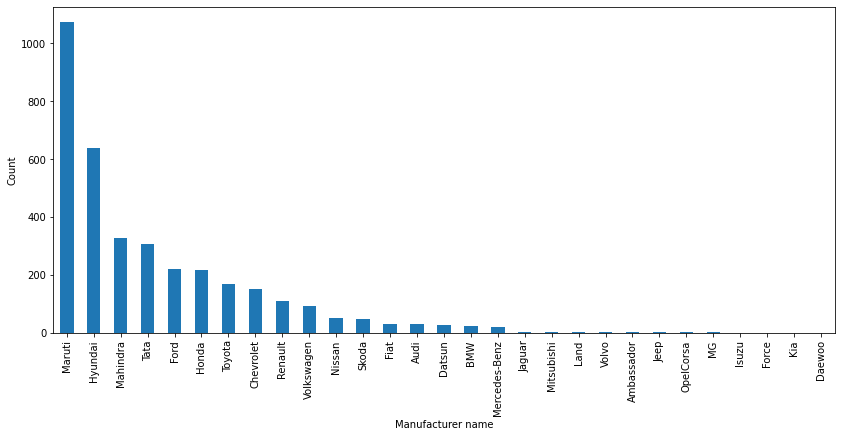

In [ ]:
tmp_df['Manufacturer'].value_counts().plot(kind='bar',figsize=(14,6))
plt.xlabel("Manufacturer name")
plt.ylabel("Count");

### **Maruti is the leading manufacturer of cars**

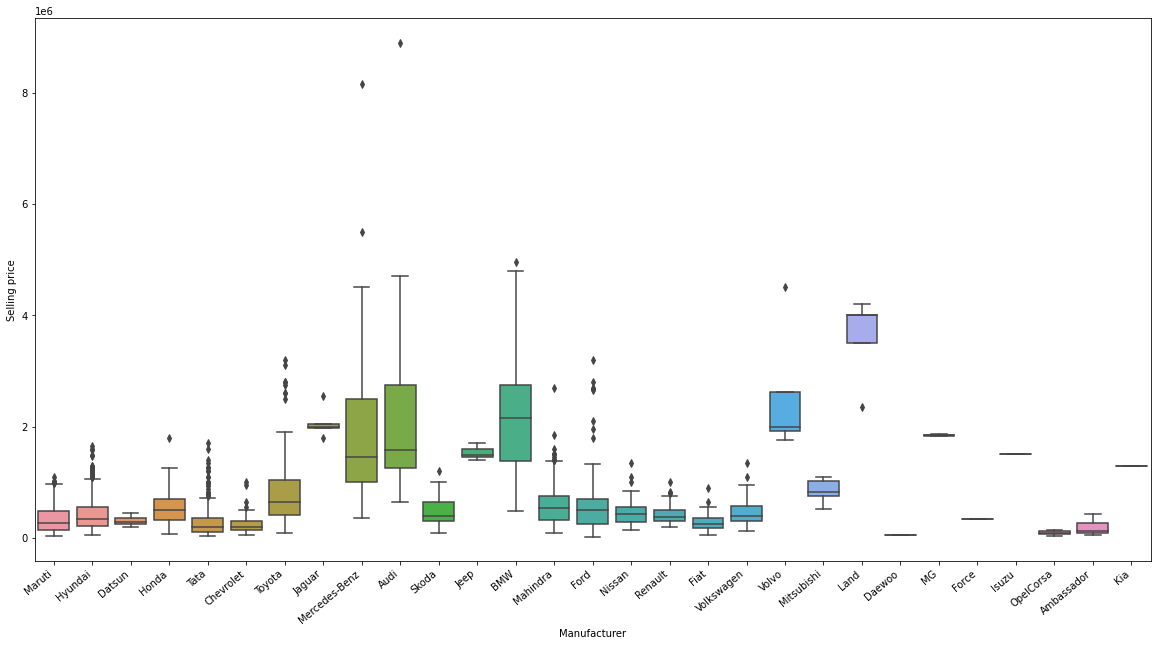

In [ ]:
#@title Boxplot of various manufacturers vs their price
plt.subplots(figsize=(20,10))
ax=sns.boxplot(x='Manufacturer',y='Selling price',data=tmp_df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right');

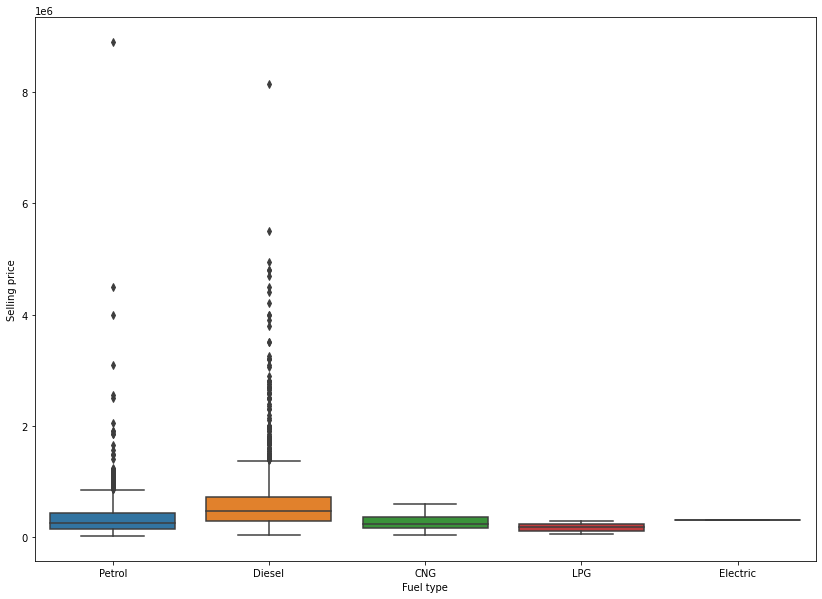

In [ ]:
#@title Boxplot for fuel type vs price
plt.subplots(figsize=(14,10))
sns.boxplot(x='Fuel type',y='Selling price',data=tmp_df);

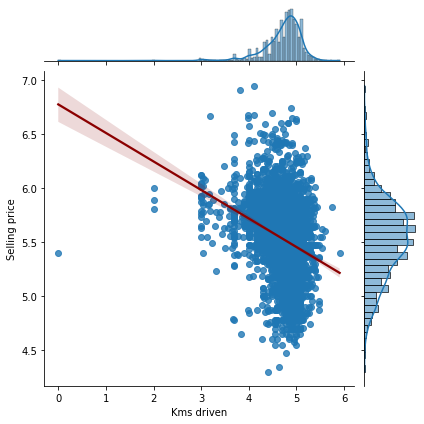

In [ ]:
sns.jointplot(x=np.log10(tmp_df['Kms driven']), y=np.log10(tmp_df['Selling price']), kind='reg',joint_kws={'line_kws':{'color':'darkred'}});

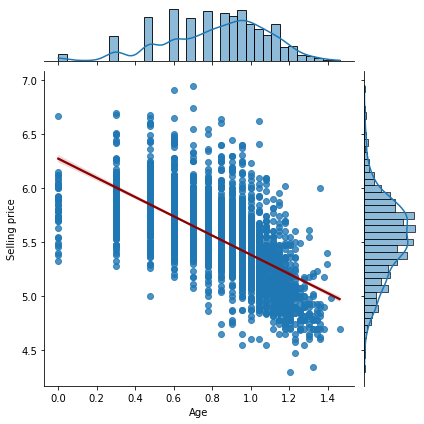

In [ ]:
sns.jointplot(x=np.log10(tmp_df['Age']), y=np.log10(tmp_df['Selling price']), kind='reg',joint_kws={'line_kws':{'color':'darkred'}});

### **Negative linear correlation between age and driven kms with selling price as**
### * **Newer the car, more the price**
### * **Less the car has been used, more the price** 

In [ ]:
mean_price = tmp_df.groupby('Name')['Selling price'].mean()

In [ ]:
tmp_df = tmp_df.merge(mean_price,on='Name',how='left')

In [ ]:
#@title Getting mean prices of cars based on the manufacturer and model
tmp_df

,Name,Selling price_x,Kms driven,Fuel type,Seller type,Transmission,Ownership type,Age,Manufacturer,Selling price_y
0,Maruti 800 AC,60000,70000,Petrol,Individual,Manual,First Owner,14,Maruti,9.925000e+04
1,Maruti Wagon R LXI Minor,135000,50000,Petrol,Individual,Manual,First Owner,14,Maruti,1.424286e+05
2,Hyundai Verna 1.6 SX,600000,100000,Diesel,Individual,Manual,First Owner,9,Hyundai,4.826921e+05
3,Datsun RediGO T Option,250000,46000,Petrol,Individual,Manual,First Owner,4,Datsun,2.219998e+05
4,Honda Amaze VX i-DTEC,450000,141000,Diesel,Individual,Manual,Second Owner,7,Honda,5.178571e+05
...,...,...,...,...,...,...,...,...,...,...
3572,Hyundai i20 Magna 1.4 CRDi (Diesel),409999,80000,Diesel,Individual,Manual,Second Owner,7,Hyundai,3.709998e+05
3573,Hyundai i20 Magna 1.4 CRDi,409999,80000,Diesel,Individual,Manual,Second Owner,7,Hyundai,4.099990e+05
3574,Maruti 800 AC BSIII,110000,83000,Petrol,Individual,Manual,Second Owner,12,Maruti,8.716667e+04
3575,Hyundai Creta 1.6 CRDi SX Option,865000,90000,Diesel,Individual,Manual,First Owner,5,Hyundai,1.126000e+06


In [ ]:
tmp_df.rename(columns={'Selling price_x':'Final price','Selling price_y':'Mean price'},inplace=True)

In [ ]:
tmp_df

,Name,Final price,Kms driven,Fuel type,Seller type,Transmission,Ownership type,Age,Manufacturer,Mean price
0,Maruti 800 AC,60000,70000,Petrol,Individual,Manual,First Owner,14,Maruti,9.925000e+04
1,Maruti Wagon R LXI Minor,135000,50000,Petrol,Individual,Manual,First Owner,14,Maruti,1.424286e+05
2,Hyundai Verna 1.6 SX,600000,100000,Diesel,Individual,Manual,First Owner,9,Hyundai,4.826921e+05
3,Datsun RediGO T Option,250000,46000,Petrol,Individual,Manual,First Owner,4,Datsun,2.219998e+05
4,Honda Amaze VX i-DTEC,450000,141000,Diesel,Individual,Manual,Second Owner,7,Honda,5.178571e+05
...,...,...,...,...,...,...,...,...,...,...
3572,Hyundai i20 Magna 1.4 CRDi (Diesel),409999,80000,Diesel,Individual,Manual,Second Owner,7,Hyundai,3.709998e+05
3573,Hyundai i20 Magna 1.4 CRDi,409999,80000,Diesel,Individual,Manual,Second Owner,7,Hyundai,4.099990e+05
3574,Maruti 800 AC BSIII,110000,83000,Petrol,Individual,Manual,Second Owner,12,Maruti,8.716667e+04
3575,Hyundai Creta 1.6 CRDi SX Option,865000,90000,Diesel,Individual,Manual,First Owner,5,Hyundai,1.126000e+06


In [ ]:
num_feature = ['Age','Mean price','Kms driven']

In [ ]:
#@title VIF for numerical features
for i in range(len(num_feature)):
  data = tmp_df[num_feature]
  y = data.loc[:, data.columns == num_feature[i]]
  x = data.loc[:, data.columns != num_feature[i]]
  model = sm.OLS(y, x)
  results = model.fit()
  rsq = results.rsquared
  vif = round(1 / (1 - rsq), 2)
  print(f"VIF for the feature {num_feature[i]} is {vif}")

VIF for the feature Age is 3.42
VIF for the feature Mean price is 1.35
VIF for the feature Kms driven is 3.55


## The VIF for numerical features is under the acceptable range so no such multicollinearity is present

In [ ]:
tmp_df

,Name,Final price,Kms driven,Fuel type,Seller type,Transmission,Ownership type,Age,Manufacturer,Mean price
0,Maruti 800 AC,60000,70000,Petrol,Individual,Manual,First Owner,14,Maruti,9.925000e+04
1,Maruti Wagon R LXI Minor,135000,50000,Petrol,Individual,Manual,First Owner,14,Maruti,1.424286e+05
2,Hyundai Verna 1.6 SX,600000,100000,Diesel,Individual,Manual,First Owner,9,Hyundai,4.826921e+05
3,Datsun RediGO T Option,250000,46000,Petrol,Individual,Manual,First Owner,4,Datsun,2.219998e+05
4,Honda Amaze VX i-DTEC,450000,141000,Diesel,Individual,Manual,Second Owner,7,Honda,5.178571e+05
...,...,...,...,...,...,...,...,...,...,...
3572,Hyundai i20 Magna 1.4 CRDi (Diesel),409999,80000,Diesel,Individual,Manual,Second Owner,7,Hyundai,3.709998e+05
3573,Hyundai i20 Magna 1.4 CRDi,409999,80000,Diesel,Individual,Manual,Second Owner,7,Hyundai,4.099990e+05
3574,Maruti 800 AC BSIII,110000,83000,Petrol,Individual,Manual,Second Owner,12,Maruti,8.716667e+04
3575,Hyundai Creta 1.6 CRDi SX Option,865000,90000,Diesel,Individual,Manual,First Owner,5,Hyundai,1.126000e+06


## Now we can start the modelling

In [ ]:
car_features = set(tmp_df.columns.to_list())-{'Final price'}

In [ ]:
# Features dataframe
X = tmp_df[car_features]

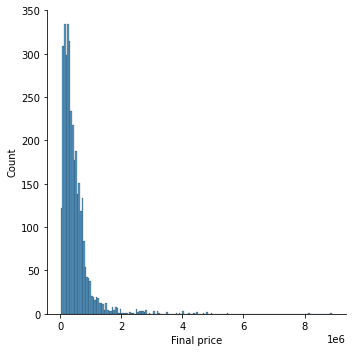

In [ ]:
sns.displot((tmp_df['Final price']));

### **Final price is rightly skewed so we will apply log transformation on it**

In [ ]:
#Target dataframe
y = np.log10(tmp_df['Final price'])

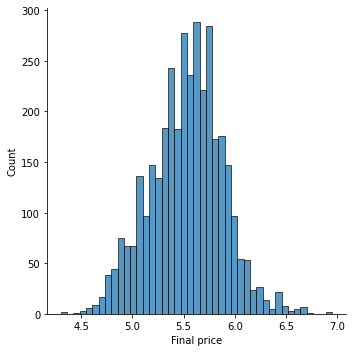

In [ ]:
sns.displot(y);

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
X_train.columns

Index(['Kms driven', 'Fuel type', 'Mean price', 'Transmission', 'Name',
       'Manufacturer', 'Seller type', 'Age', 'Ownership type'],
      dtype='object')

In [ ]:
categorical_fea = ['Fuel type','Transmission','Name','Manufacturer','Seller type','Ownership type']

In [ ]:
#@title One hot encoding all categorical features, it will increase the size of our features massively but give more precise answers
ohe = OneHotEncoder()
ohe.fit(X[categorical_fea])

In [ ]:
#@title Creating a column transformer which will incorporate numerical features as it is and categorical features will be one hot encoded
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),categorical_fea),remainder='passthrough')

In [ ]:
lr=LinearRegression()

In [ ]:
#@title Creating a pipeline for linear regerssion model and column transformer
pipe=make_pipeline(column_trans,lr)

In [ ]:
#fitting the linear model via the pipeline
pipe.fit(X_train,y_train)

In [ ]:
#Predicting train values
y_pred_train = pipe.predict(X_train)

In [ ]:
#@title The sum of residuals is approximately zero
round(np.mean(y_train - y_pred_train))

0

In [ ]:
#@title R2 score for training
r2_score(y_train,y_pred_train)

0.9452184581399475

In [ ]:
y_pred_test =pipe.predict(X_test)

In [ ]:
#@title R2 score for testing
r2_score(y_test,y_pred_test)

0.8645023569970128

In [ ]:
print(f"The rms error for the training set is {mean_squared_error(y_train,y_pred_train)}")

The rms error for the training set is 0.00698643111901455


In [ ]:
print(f"The rms error for the training set is {mean_squared_error(y_test,y_pred_test)}")

The rms error for the training set is 0.016183487579254613


In [ ]:
predicted_price_in_units = np.around(10 ** y_pred_test,2)

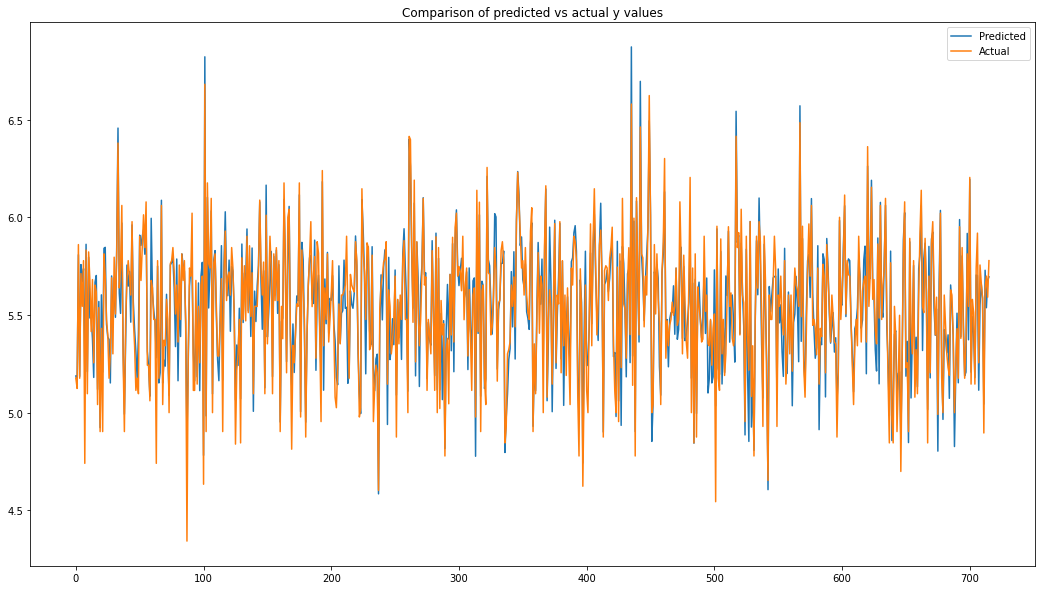

In [ ]:
# @title Predicted vs actual comparison
plt.figure(figsize=(18,10))
plt.plot((y_pred_test))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.title("Comparison of predicted vs actual y values")
plt.show()

In [ ]:
#@title Getting all features name, one hot encoded included
feature_names = (pipe.named_steps['columntransformer']
                      .named_transformers_['onehotencoder']
                      .get_feature_names(input_features=categorical_fea))
feature_names = np.concatenate(
    [feature_names, num_feature])

In [ ]:
feature_names

array(['Fuel type_CNG', 'Fuel type_Diesel', 'Fuel type_Electric', ...,
       'Age', 'Mean price', 'Kms driven'], dtype=object)

In [ ]:
#@title Creating a dataframe for all coefficients
coefs = pd.DataFrame(
    pipe.named_steps['linearregression'].coef_,
    columns=['Coefficients'], index=feature_names
)

In [ ]:
print("The coefficients for the fitted model are ")
coefs

The coefficients for the fitted model are 


,Coefficients
Fuel type_CNG,-9.118701e-02
Fuel type_Diesel,1.262430e-01
Fuel type_Electric,2.834116e-02
Fuel type_LPG,-6.222343e-02
Fuel type_Petrol,-1.173702e-03
...,...
Ownership type_Test Drive Car,2.223880e-02
Ownership type_Third Owner,-2.683905e-02
Age,-4.464129e-07
Mean price,2.286150e-07


### **Lasso regularization**

In [ ]:
#@title Implementing lasso regularization
alphas = [0.001,0.005,0.01,0.1,0.5,1,5,8]
weight_dict = {}
lasso_scores = []
for i in alphas:
  las = Lasso(alpha = i, fit_intercept = True)
  lasso_pipe = make_pipeline(column_trans,las)
  lasso_pipe.fit(X_train,y_train)
  coefs_lasso = pd.DataFrame(lasso_pipe.named_steps['lasso'].coef_,columns=['Coefficients'], index=feature_names)
  weight_dict[i] = coefs_lasso['Coefficients'].values
  y_lasso_train = lasso_pipe.predict(X_train)
  y_lasso_test = lasso_pipe.predict(X_test)
  score = r2_score(y_test,y_lasso_test)
  lasso_scores.append(score)

In [ ]:
print(f"The r2 scores for lasso regularization are \n{lasso_scores}")

The r2 scores for lasso regularization are 
[0.8436377627898953, 0.8291742111917759, 0.8140994717333422, 0.7845385006807137, 0.6398096279399533, 0.6164585901568816, 0.6164724262480756, 0.6164826935411013]


In [ ]:
print(f"The best alpha value is at {alphas[np.argmax(lasso_scores)]}")

The best alpha value is at 0.001


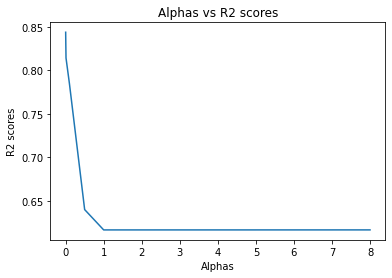

In [ ]:
plt.plot(alphas,lasso_scores)
plt.xlabel("Alphas")
plt.ylabel("R2 scores")
plt.title("Alphas vs R2 scores");

In [ ]:
#@title Feature importance dataframe for all values of alphas
lasso_df = pd.DataFrame(weight_dict,columns=alphas,index=feature_names)
lasso_df

,0.001,0.005,0.010,0.100,0.500,1.000,5.000,8.000
Fuel type_CNG,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00
Fuel type_Diesel,1.353024e-01,1.139367e-01,8.703497e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Fuel type_Electric,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Fuel type_LPG,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00
Fuel type_Petrol,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00
...,...,...,...,...,...,...,...,...
Ownership type_Test Drive Car,-0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Ownership type_Third Owner,-8.160733e-03,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00
Age,-1.682214e-07,-2.777021e-08,1.100445e-07,2.798533e-07,-7.796767e-07,-8.746235e-07,-8.727220e-07,-8.712958e-07
Mean price,3.054658e-07,3.514823e-07,3.736992e-07,4.189041e-07,5.080644e-07,5.160731e-07,5.160855e-07,5.160948e-07


### **As alpha value increases, the coefficients become zero and only some coefficients remain**

### **Ridge**

In [ ]:
#@title Implementing ridge regularization
alphas_ridge = 10 ** np.arange(1, 5)
weight_dict_ridge = {}
ridge_scores = []
for i in alphas_ridge:
  rid = Ridge(alpha = i, fit_intercept = True)
  ridge_pipe = make_pipeline(column_trans,rid)
  ridge_pipe.fit(X_train,y_train)
  coefs_ridge = pd.DataFrame(ridge_pipe.named_steps['ridge'].coef_,columns=['Coefficients'], index=feature_names)
  weight_dict_ridge[i] = coefs_ridge['Coefficients'].values
  y_ridge_train = ridge_pipe.predict(X_train)
  y_ridge_test = ridge_pipe.predict(X_test)
  rid_score = r2_score(y_test,y_ridge_test)
  ridge_scores.append(rid_score)

In [ ]:
ridge_scores


[0.6164551106440848,
 0.6164551106441937,
 0.6164551106452653,
 0.6164551106559782]

In [ ]:
ridge_df = pd.DataFrame(weight_dict_ridge,columns=alphas_ridge,index=feature_names)
#,name="Ridge Regularization coefficients"

In [ ]:
ridge_df

,10,100,1000,10000
Fuel type_CNG,-3.276163e-13,-3.276163e-13,-3.276163e-13,-3.276163e-13
Fuel type_Diesel,1.497424e-11,1.497424e-11,1.497424e-11,1.497424e-11
Fuel type_Electric,8.548477e-15,8.548477e-15,8.548477e-15,8.548477e-15
Fuel type_LPG,-5.996877e-13,-5.996877e-13,-5.996877e-13,-5.996877e-13
Fuel type_Petrol,-1.405548e-11,-1.405548e-11,-1.405548e-11,-1.405548e-11
...,...,...,...,...
Ownership type_Test Drive Car,4.264467e-13,4.264467e-13,4.264467e-13,4.264467e-13
Ownership type_Third Owner,-5.327215e-12,-5.327215e-12,-5.327215e-12,-5.327215e-12
Age,-8.750986e-07,-8.750986e-07,-8.750986e-07,-8.750986e-07
Mean price,5.160700e-07,5.160700e-07,5.160700e-07,5.160700e-07
